# Customer Segmentation with KMeans Clustering
In the previous project we have successfully cleaned our data
Now we shall use the same data to segment 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.cluster import KMeans, k_means
sns.set()

In [2]:
df = pd.read_csv("pre_processed.csv")
#df = df.drop(df.columns[0], axis = 1)
pd.set_option ('display.max_columns', None)
df.head()

,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_age,transaction_month,age_band
0,2,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,Male,19,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,5,2,old
1,1,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,Male,19,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,14,10,old
2,62,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,Male,19,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,7,4,old
3,3,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,Female,89,Health,Mass Customer,N,Yes,10.0,NSW,5,3,5,young_adults
4,4,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,Female,89,Health,Mass Customer,N,Yes,10.0,NSW,5,6,10,young_adults


In [3]:
df.columns

Index(['product_id', 'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'state', 'property_valuation', 'product_age',
       'transaction_month', 'age_band'],
      dtype='object')

## Dropping Irrelevant features
In clustering since were are tryin to adentify customer trends and behaviours and segment them accordingly some features may not be usefull in our modelling. These featuers are good for information purposes and gives good insight. However, they have little use in the quantitative analysis and may not contribute in making results better rather than increase the number of our features 

In [4]:
df.drop(columns=["order_status","list_price","deceased_indicator","list_price"])

,product_id,online_order,brand,product_line,product_class,product_size,standard_cost,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,product_age,transaction_month,age_band
0,2,0.0,Solex,Standard,medium,medium,53.62,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,5,2,old
1,1,0.0,Giant Bicycles,Standard,medium,medium,954.82,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,14,10,old
2,62,0.0,Solex,Standard,medium,medium,298.72,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,6,7,4,old
3,3,1.0,Trek Bicycles,Standard,medium,large,388.92,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,3,5,young_adults
4,4,0.0,Giant Bicycles,Standard,high,medium,677.48,Female,89,Health,Mass Customer,Yes,10.0,NSW,5,6,10,young_adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18973,68,1.0,OHM Cycles,Standard,medium,medium,44.71,Male,32,Manufacturing,Mass Customer,No,1.0,NSW,7,7,2,young
18974,17,0.0,Solex,Standard,high,medium,614.80,Female,66,Financial Services,Affluent Customer,Yes,7.0,NSW,11,21,12,young
18975,80,0.0,OHM Cycles,Touring,low,medium,933.84,Female,66,Financial Services,Affluent Customer,Yes,7.0,NSW,11,2,6,young
18976,69,1.0,Giant Bicycles,Road,medium,medium,594.68,Male,8,Manufacturing,Mass Customer,No,14.0,QLD,4,25,12,old_adult


<AxesSubplot:>

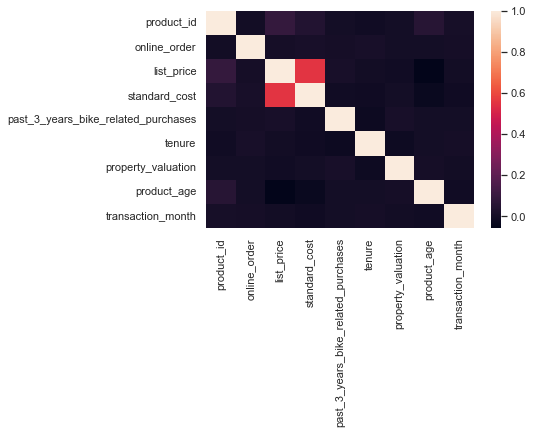

In [5]:
df_corr = df.corr()
sns.heatmap(df_corr)

<AxesSubplot:>

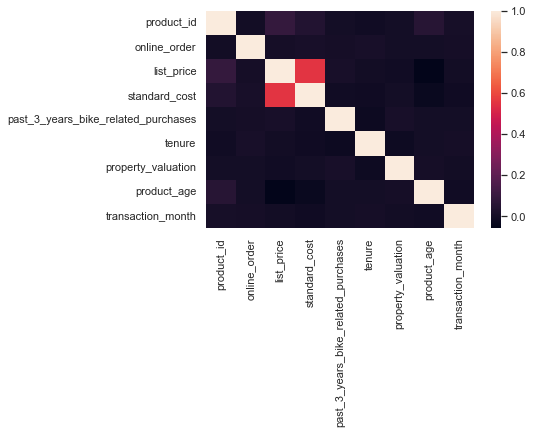

In [6]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [7]:
df.columns

Index(['product_id', 'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'state', 'property_valuation', 'product_age',
       'transaction_month', 'age_band'],
      dtype='object')

## Features Encoding
Feature encoding is the process of transforming categorical or text data into a numerical representation that can be used in machine learning algorithms. This is necessary because KMeans machine learning algorithms require input data to be numerical. Encoding converts categorical features into a set of numerical values, allowing the machine learning algorithm to understand and use these features in its calculations. 
Common methods of feature encoding include one-hot encoding, label encoding, and ordinal encoding. 

### Label Encoding
We will start with Label encoding, we will assigns a numerical label to each category with two unique observation, with the numbers corresponding to the order of appearance of the categories in the data.

In [8]:
# We define a function to encode 
def encoder(data):
    # Encoding the gender column which has only two unique observation: Male/Female
    data["gender"] = data["gender"].map({"Male":1, "Female":0})
    
    # Encoding deceased_indicator which has Y/N unique observations
    #data["deceased_indicator"] = data["deceased_indicator"].map({"N":1,"Y":0})
    
    # Encoding owns_car which also has two unique entries Yes/No
    data["owns_car"] = data["owns_car"].map({"Yes":1,"No":0})
    
    # Encoding order stantus which also has twon unique entries Approved/Cancelled
    #data["order_status"] = data["order_status"].map({"Approved":1,"Cancelled":0})
    
    # Encoding order stantus which also has twon unique entries Approved/Cancelled
    data["state"] = data["state"].map({"NSW":2,"VIC":1, "QLD":0})
    
    return data

In [9]:
df = encoder(df)

In [10]:
# Function to see the Datatypes and the number of their unique values 
def dtype(tp):
    
    return df.select_dtypes(tp).nunique()

In [11]:
print(dtype("number"))
print("--"*50)
print(dtype("object"))

product_id                             101
online_order                             2
list_price                             100
standard_cost                          100
gender                                   2
past_3_years_bike_related_purchases    100
owns_car                                 2
tenure                                  22
state                                    3
property_valuation                      12
product_age                             26
transaction_month                       12
dtype: int64
----------------------------------------------------------------------------------------------------
order_status              2
brand                     6
product_line              4
product_class             3
product_size              3
job_industry_category    10
wealth_segment            3
deceased_indicator        2
age_band                  5
dtype: int64


### Rearranging our features with most impotant features first 
Arrangement of the features could affect the results of K-means clustering. For example, if some features are more important or relevant to the clustering task than others, arranging them in order of their importance could lead to better results. we will use our domain knowledge or feature selection techniques to identify and prioritize the most important features before running K-means clustering.

In [12]:
arranger = ['state', 'age_band', 'gender','job_industry_category', 'wealth_segment',
            'product_id',  'brand', 'product_line','product_size',
       'past_3_years_bike_related_purchases','product_class', 'standard_cost',
       'product_age','owns_car', 'tenure', 
       'transaction_month','online_order',]
df = df[arranger]


### One Hot Encoding (Creating Dummy Variables)
One-hot encoding creates a binary vector for each categorical value, with a 1 in the vector corresponding to the presence of the value and 0 otherwise.

In [13]:
# Generating our features  
features = dtype("object").index

In [14]:
# Creating the cummy variables
new_df = pd.get_dummies(df, columns=features)
new_df.head()

,state,gender,product_id,past_3_years_bike_related_purchases,standard_cost,product_age,owns_car,tenure,transaction_month,online_order,age_band_old,age_band_old_adult,age_band_older,age_band_young,age_band_young_adults,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_other,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,product_size_large,product_size_medium,product_size_small,product_class_high,product_class_low,product_class_medium
0,1,1,2,19,53.62,5,1,10.0,2,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,1,1,1,19,954.82,14,1,10.0,10,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,1,1,62,19,298.72,7,1,10.0,4,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
3,2,0,3,89,388.92,3,1,10.0,5,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4,2,0,4,89,677.48,6,1,10.0,10,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


# Modeling (K-Means Clustering)

In [15]:
X_train = new_df.values
# We will start with 5 clusters 5
k = 5

# Fitting the model
kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 31)
kmeans = kmeans.fit(X_train)

# Printing the Inertia
print(f"The inertia is: {kmeans.inertia_}")

The inertia is: 175642176.36264634


looking at the value of our inertia above it is clear that our model is not good. we will inprove it some statistical techniques 
#### What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.



# Standadization
Since K-means clustering is a distance-based algorithm that tries to minimize the sum of squared distances between the data points and their assigned cluster centroids. Then variables in the dataset have different scales or units, then some variables may dominate the distance calculations, leading to biased results. To avoid this biase we will standadize.

Standardizing the data ensures that all variables have the same scale and magnitude, allowing the algorithm to work more effectively. In addition, standardizing the data helps with the interpretation of the results, as it makes the cluster centers directly comparable and easier to understand.

Note that standardization is not always required for k-means clustering, particularly if the variables have similar scales or if the distances between the data points are already standardized in some way.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# Assigning our training dataset
training_data = new_df.values
X_train_scaled = scaler.fit_transform(training_data)

In [18]:
k = 5
def model(k):

    # Fitting the model
    kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 21)
    kmeans = kmeans.fit(X_train_scaled)
    # Printing the Inertia
    print(f"The inertia is: {kmeans.inertia_}")
model(k)

The inertia is: 718894.7781766385


In [19]:
# Now we want to find the best value for our k
inertia = []
clusters = range(1,11)
for i in clusters:
    
    kmeans = KMeans(n_clusters = i, init = "k-means++",  random_state = 3)
    kmeans = kmeans.fit(X_train_scaled)
    
    y = kmeans.inertia_
    inertia.append(y)
    
    # Printing the Inertia
    print(f"The inertia is: {kmeans.inertia_}")

The inertia is: 835032.0000000044
The inertia is: 793472.3078260557
The inertia is: 765553.608565341
The inertia is: 743426.4414170616
The inertia is: 718116.814418855
The inertia is: 704013.1330306253
The inertia is: 684299.129242648
The inertia is: 670501.3891377861
The inertia is: 655540.4897717803
The inertia is: 650054.0507796024


Text(0.5, 1.0, 'the elbow method')

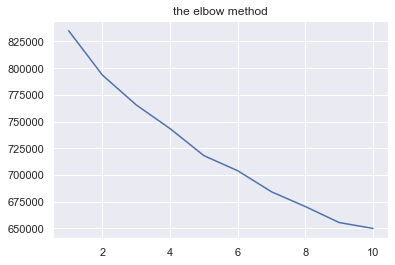

In [20]:
plt.plot(range(1,11), inertia)
plt.title("the elbow method")

**Elbow method:** Elbow method is a popular technique for finding the optimal number of centroids for KMeans algorithm. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters, and selecting the number of clusters where the rate of decrease in WCSS starts to slow down.
from our graph we might say the best number of clusters should be 5

In [21]:
# We will start with 5 clusters 5
k = 5

# Fitting the model
kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 2)
kmeans = kmeans.fit(X_train_scaled)

# Printing the Inertia
print(f"The inertia is: {kmeans.inertia_}")

The inertia is: 718973.155687653


In [22]:
kmeans.labels_

array([1, 1, 1, ..., 4, 0, 1])

In [23]:
# Since the data set we used for our prediction is not new it will be thesame as out kmeans.label_
prediction = kmeans.predict(X_train_scaled)
prediction

array([1, 1, 1, ..., 4, 0, 1])

In [24]:
# Identifying the unique values in our prediction and counting the observation
unique,count = np.unique(prediction, return_counts=True)
print(unique)
print(count)

[0 1 2 3 4]
[3143 8270 2706 3687 1172]


In [25]:
# Reshaping to create a data frames with labes 
#target_name = ['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4' ]
target_name = ['cluster 0','cluster 1','cluster 2', 'cluster 3', 'cluster 4']
count = count.reshape(1,5)
cluster = pd.DataFrame(count, columns=target_name)
cluster

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4
0,3143,8270,2706,3687,1172


# Principal COmponent Analysis 

In [26]:
from sklearn.decomposition import PCA

[0.05913121 0.05310542]


<Figure size 432x288 with 0 Axes>

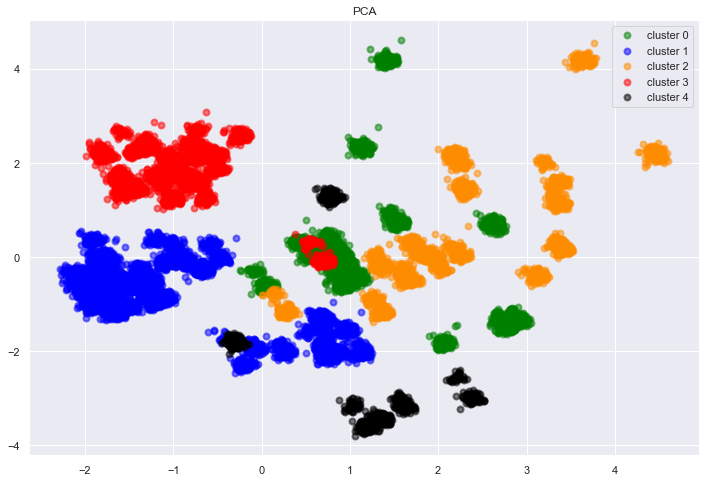

In [27]:
X= X_train_scaled

pca = PCA(n_components=2, random_state = 41)
pca.fit(X)
pca_trans = pca.transform(X_train_scaled)

pca_trans.shape
explainer = pca.explained_variance_ratio_
print(explainer)
    
plt.figure()
plt.figure(figsize=(12,8))
colors = ['green','blue','darkorange','red','black']
lw = 2

for color,i,target_name in zip(colors, [0,1,2,3,4], target_name):
    plt.scatter(pca_trans[prediction==i,0], pca_trans[prediction==i,1], color=color, alpha = 0.5, lw=lw, label=target_name)

plt.legend(loc='best')
plt.title("PCA")
plt.show() 


In [28]:
var = sum(pca.explained_variance_)
print(f"total variance in our dataset is: {var}")

# We want to keep 95% of the variance
var95 = var*0.95
print(f"95% variance in our dataset is: {var95}")

total variance in our dataset is: 4.938672289622372
95% variance in our dataset is: 4.691738675141253


In [29]:
n_components = X.shape[1]

pca = PCA(n_components=n_components, random_state = 41)
pca.fit(X)
pca_transform = pca.transform(X)
                              


In [32]:
p = zip(range(0,n_components), pca.explained_variance_.round(4))
p = pd.DataFrame(p, columns=["PCA exp","explained_variance"])

p.head()

,PCA exp,explained_variance
0,0,2.6019
1,1,2.3368
2,2,1.8910
3,3,1.8395
4,4,1.7018


In [31]:
#com_num = [15,20,25,30,35,40,44]
#for i in com_num:
print(f"variance explained with {15} n_compoment", sum(p['explained_variance'][0:15]))
print(f"variance explained with {20} n_compoment", sum(p['explained_variance'][0:20]))

variance explained with 15 n_compoment 23.793200000000002
variance explained with 20 n_compoment 29.253100000000003
